In [132]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import warnings
import os
import random
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
warnings.filterwarnings('ignore')
%matplotlib inline

In [109]:
# conv layer -> extracts important features from the images
# pooling layer -> reduces the dimensionality of learned features of the images

In [110]:
# ! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

In [111]:
# ! unzip pizza_steak.zip

In [112]:
print(len(os.listdir("pizza_steak/train/pizza")))
print(len(os.listdir("pizza_steak/train/steak")))
print(len(os.listdir("pizza_steak/test/pizza")))
print(len(os.listdir("pizza_steak/test/steak")))

750
750
250
250


In [113]:
TRAIN_PATH = "pizza_steak/train"
TEST_PATH = "pizza_steak/test"

In [114]:
class_names = []
for class_name in os.listdir(TRAIN_PATH):
  class_names.append(class_name)

In [115]:
class_names = np.array(class_names)
print(class_names)

['pizza' 'steak']


In [116]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + "/" + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape : {img.shape}")
  return img

['1403878.jpg']
Image shape : (512, 512, 3)


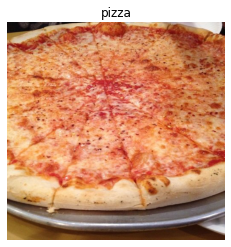

In [117]:
img = view_random_image(target_dir="pizza_steak/train", target_class="pizza")

In [118]:
# ImageDataGenerator -> is used to load images and also for applying augmentations

In [119]:
tf.random.set_seed(42)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [120]:
train_data = train_datagen.flow_from_directory(directory=TRAIN_PATH, 
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42,
                                               shuffle=True)
test_data = test_datagen.flow_from_directory(directory=TEST_PATH,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             seed=42,
                                             shuffle=True)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [121]:
# filters -> number of filters i.e sliding windows which will pass over the image's tensor
# kernel_size -> also called as filter size, determines size/shape of sliding windows/filters
# padding -> if "same" then pads the output tensor to preserve input tensor shape, if "valid" then does not pad the output tensor
# strides -> number of steps a filter takes across an image at a time

In [122]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(224,224,3)))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")) 
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")) 
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu")) 
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [123]:
history = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
47/47 [==============================] - 12s 230ms/step - loss: 0.6072 - accuracy: 0.6813 - val_loss: 0.4969 - val_accuracy: 0.7900
Epoch 2/10
47/47 [==============================] - 10s 216ms/step - loss: 0.4861 - accuracy: 0.7893 - val_loss: 0.4489 - val_accuracy: 0.7900
Epoch 3/10
47/47 [==============================] - 10s 221ms/step - loss: 0.4414 - accuracy: 0.8120 - val_loss: 0.3733 - val_accuracy: 0.8460
Epoch 4/10
47/47 [==============================] - 10s 219ms/step - loss: 0.4122 - accuracy: 0.8293 - val_loss: 0.4646 - val_accuracy: 0.7760
Epoch 5/10
47/47 [==============================] - 11s 223ms/step - loss: 0.4122 - accuracy: 0.8280 - val_loss: 0.3442 - val_accuracy: 0.8600
Epoch 6/10
47/47 [==============================] - 11s 225ms/step - loss: 0.3582 - accuracy: 0.8567 - val_loss: 0.4035 - val_accuracy: 0.8340
Epoch 7/10
47/47 [==============================] - 10s 209ms/step - loss: 0.3788 - accuracy: 0.8493 - val_loss: 0.3759 - val_accuracy: 0.8540

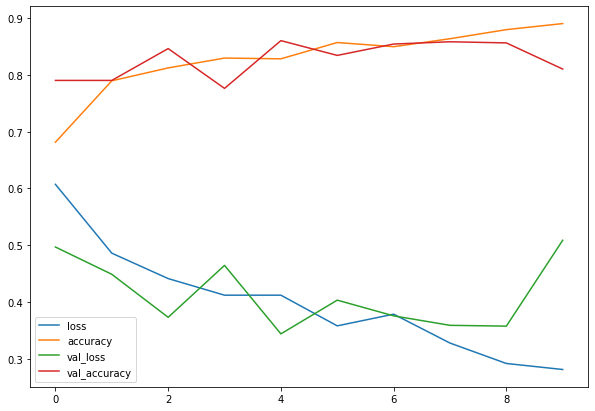

In [124]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.show()

In [125]:
train_augmented_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                       rotation_range=0.2,
                                                                       shear_range=0.2,
                                                                       zoom_range=0.2,
                                                                       width_shift_range=0.2,
                                                                       height_shift_range=0.2,
                                                                       horizontal_flip=True)

In [126]:
train_data_augmented = train_augmented_datagen.flow_from_directory(directory=TRAIN_PATH,
                                                                   target_size=(224,224),
                                                                   class_mode="binary",
                                                                   seed=42,
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


In [127]:
# ImageDataGenerator keeps the images as they are in the directories but performs augmentation as they are loaded into the model
# Augmentation is performed generally only on the training data

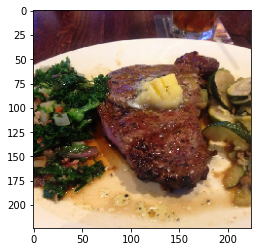

In [128]:
plt.imshow(train_data.next()[0][0])
plt.show()

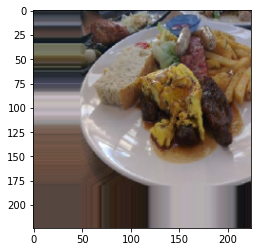

In [129]:
plt.imshow(train_data_augmented.next()[0][0])
plt.show()

In [130]:
history = model.fit(train_data_augmented, epochs=10, validation_data=test_data)

Epoch 1/10
47/47 [==============================] - 24s 514ms/step - loss: 0.4985 - accuracy: 0.7680 - val_loss: 0.4245 - val_accuracy: 0.8200
Epoch 2/10
47/47 [==============================] - 24s 508ms/step - loss: 0.4844 - accuracy: 0.7853 - val_loss: 0.4157 - val_accuracy: 0.8340
Epoch 3/10
47/47 [==============================] - 24s 509ms/step - loss: 0.4482 - accuracy: 0.8020 - val_loss: 0.3775 - val_accuracy: 0.8380
Epoch 4/10
47/47 [==============================] - 24s 510ms/step - loss: 0.4322 - accuracy: 0.8120 - val_loss: 0.3676 - val_accuracy: 0.8560
Epoch 5/10
47/47 [==============================] - 24s 508ms/step - loss: 0.4307 - accuracy: 0.8153 - val_loss: 0.3150 - val_accuracy: 0.8860
Epoch 6/10
47/47 [==============================] - 24s 503ms/step - loss: 0.4265 - accuracy: 0.8060 - val_loss: 0.3545 - val_accuracy: 0.8580
Epoch 7/10
47/47 [==============================] - 24s 502ms/step - loss: 0.3967 - accuracy: 0.8267 - val_loss: 0.3221 - val_accuracy: 0.8740

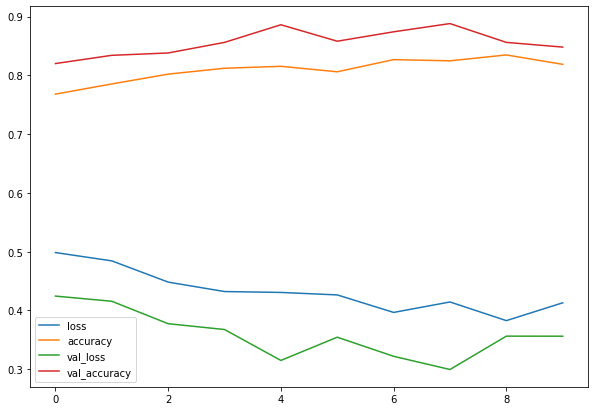

In [131]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.show()

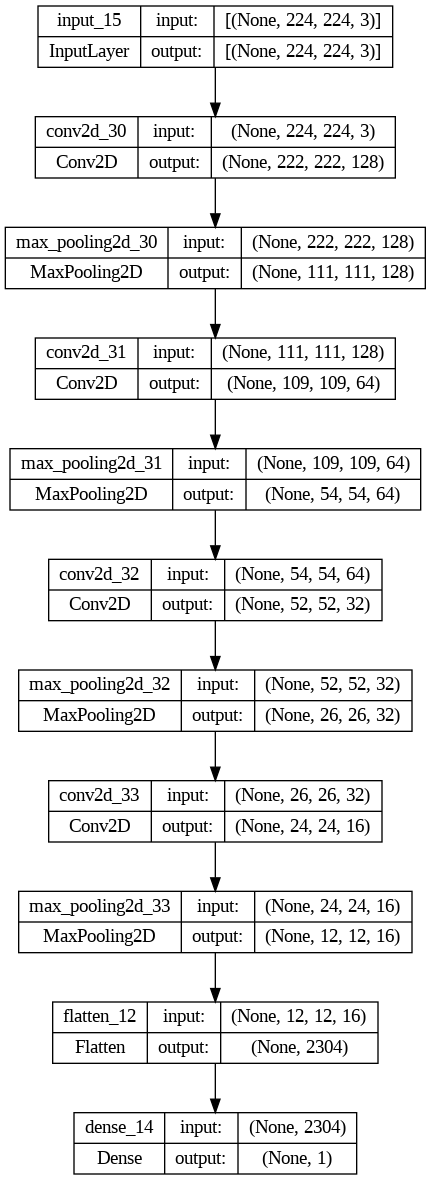

In [134]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [142]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [143]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if (len(pred[0] > 1)):
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [144]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 

--2023-02-19 13:43:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.007s  

2023-02-19 13:43:37 (257 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



1/1 [==============================] - 0s 290ms/step


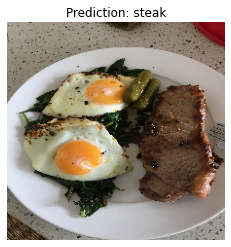

In [146]:
pred_and_plot(model, "03-steak.jpeg", class_names)